<h1 style="text-align: center;">Pendekatan Numerik untuk Persamaan Schrodinger</h1>
<h3 style="text-align: center;">Fadjar Fathurrahman</h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("svg")
%matplotlib inline

In [3]:
import matplotlib
matplotlib.style.use("dark_background")

In [4]:
import scipy.linalg

# Solusi keadaan terikat untuk osilator dengan menggunakan metode variasional

Persamaan Schrodinger:
$$
\left[ -\frac{\hbar^2}{2m}\frac{\mathrm{d}^2}{\mathrm{d}x^2} - V(x) \right] \psi(x) =
E\psi(x)
$$
dengan:
$$
V(x) = \frac{1}{2}m \omega^2 x^2
$$
di mana $m$ adalah massa partikel dan $\omega$ adalah frekuensi osilator.

Fungsi basis Gaussian:
$$
\phi_{i}(x) = \left(\frac{\nu_{i}}{\pi}\right)^{\frac{1}{2}}
\mathrm{e}^{-\nu_{i}(x-s_{i})^2}
$$

In [6]:
def eval_gaussian_basis(ν, s, x):
    return (ν/np.pi)**0.5 * np.exp(-ν*(x-s)**2)

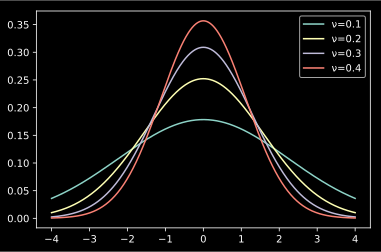

In [9]:
NptsPlt = 500
x = np.linspace(-4.0, 4.0, NptsPlt)
ν_s = [0.1, 0.2, 0.3, 0.4]
s0 = 0.0
plt.clf()
for ν in ν_s:
    plt.plot(x, eval_gaussian_basis(ν, s0, x), label="ν="+str(ν))
plt.legend();

In [30]:
# Gunakan Gaussian 1D dengan titik pusat yang berbeda-beda
N = 101
ν = 1.0
H = np.zeros((N,N))
S = np.zeros((N,N))
    
centers = np.zeros(N)
for i in range(N):
    centers[i] = -25.0 + i*0.5

for i in range(N):
    for j in range(N):
        ss = (centers[i] - centers[j])**2
        S[i,j] = np.exp(-0.5*ν*ss)
        kin = 0.5*np.exp(-0.5*ν*ss)*ν*(1.0 - ν*ss)
        pot = 0.5*np.exp(-0.5*ν*ss)*0.25*(1.0/ν + (centers[i] + centers[j])**2)
        H[i,j] = kin + pot

In [31]:
evals, evecs = scipy.linalg.eigh(H, S)

In [32]:
evals

array([  0.5       ,   1.5       ,   2.5       ,   3.5       ,
         4.5       ,   5.5       ,   6.50000001,   7.50000016,
         8.50000021,   9.50000722,  10.50000404,  11.50018212,
        12.500033  ,  13.50268834,  14.50006184,  15.52327999,
        16.50022872,  17.6192657 ,  18.51359018,  19.88745053,
        20.61701232,  22.40173339,  22.94813618,  25.18659381,
        25.58738998,  28.24208109,  28.53908503,  31.56325526,
        31.78666588,  35.14575195,  35.31592443,  38.98645871,
        39.11731247,  43.08324594,  43.18457485,  47.43465517,
        47.51353261,  52.03967577,  52.10131831,  56.8975994 ,
        56.94591686,  62.00792724,  62.04588652,  67.37031151,
        67.40018542,  72.98451939,  73.0080618 ,  78.85041204,
        78.86898404,  84.96793453,  84.98259706,  91.33711431,
        91.34869721,  97.95806727,  97.96722137, 104.83101134,
       104.83824817, 111.95628839, 111.96201067, 119.33439615,
       119.33892137, 126.96603261, 126.96961131, 134.85

In [51]:
NptsPlt = 500
A = -25.0
B =  25.0
xplt = np.linspace(A, B, NptsPlt)
yplt = np.zeros(NptsPlt)
for i in range(N):
    yplt[:] = yplt[:] + evecs[i,3]*eval_gaussian_basis(ν, centers[i], xplt)

(-10, 10)

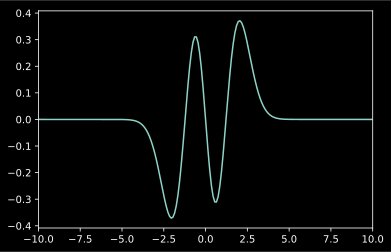

In [54]:
plt.clf()
plt.plot(xplt, yplt)
plt.xlim(-10,10)

# Metode grid

In [11]:
N = 201
Hamiltonian = np.zeros( (N,N) )

A = -10.0
B = 10.0
h = (B-A)/(N-1)

x = np.zeros(N)
for i in range(N):
    x[i] = A + i*h
    
w = 0.5/h**2

omega = 1.0
for i in range(N):
    Hamiltonian[i,i] = 2.0*w + 0.5*omega*x[i]**2
    if i != N-1:
        Hamiltonian[i,i+1] = -w
        Hamiltonian[i+1,i] = -w


In [12]:
evals, evecs = scipy.linalg.eigh(Hamiltonian)

In [14]:
evals

array([  0.4996873 ,   1.49843574,   2.49593063,   3.49216962,
         4.48715031,   5.4808703 ,   6.47332717,   7.46451849,
         8.4544418 ,   9.44309464,  10.43047452,  11.41657896,
        12.40140543,  13.38495141,  14.36721434,  15.34819166,
        16.32788079,  17.30627913,  18.28338406,  19.25919295,
        20.23370315,  21.20691199,  22.17881677,  23.1494148 ,
        24.11870334,  25.08667965,  26.05334097,  27.01868452,
        27.98270749,  28.94540706,  29.90678039,  30.86682461,
        31.82553686,  32.78291423,  33.73895389,  34.69365308,
        35.64700947,  36.5990219 ,  37.54969238,  38.49903099,
        39.44706681,  40.39387122,  41.33960275,  42.28458587,
        43.22943297,  44.17520455,  45.12357172,  46.07690805,
        47.03822388,  48.01090039,  48.99827864,  50.00324416,
        51.0279498 ,  52.07373794,  53.14122707,  54.23048177,
        55.34119266,  56.47282568,  57.62472902,  58.7962021 ,
        59.98653634,  61.19503722,  62.42103485,  63.66

In [13]:
plt.clf()
plt

array([  0.4996873 ,   1.49843574,   2.49593063,   3.49216962,
         4.48715031,   5.4808703 ,   6.47332717,   7.46451849,
         8.4544418 ,   9.44309464,  10.43047452,  11.41657896,
        12.40140543,  13.38495141,  14.36721434,  15.34819166,
        16.32788079,  17.30627913,  18.28338406,  19.25919295,
        20.23370315,  21.20691199,  22.17881677,  23.1494148 ,
        24.11870334,  25.08667965,  26.05334097,  27.01868452,
        27.98270749,  28.94540706,  29.90678039,  30.86682461,
        31.82553686,  32.78291423,  33.73895389,  34.69365308,
        35.64700947,  36.5990219 ,  37.54969238,  38.49903099,
        39.44706681,  40.39387122,  41.33960275,  42.28458587,
        43.22943297,  44.17520455,  45.12357172,  46.07690805,
        47.03822388,  48.01090039,  48.99827864,  50.00324416,
        51.0279498 ,  52.07373794,  53.14122707,  54.23048177,
        55.34119266,  56.47282568,  57.62472902,  58.7962021 ,
        59.98653634,  61.19503722,  62.42103485,  63.66

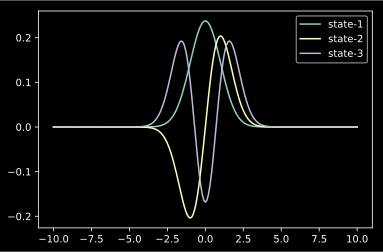

In [19]:
plt.clf()
for i in range(3):
    plt.plot(x, evecs[:,i], label="state-"+str(i+1))
plt.legend()

# Potensial periodik

In [32]:
N = 401

A = 0.0
B = 5.0

v0 = 1.5

hh = (B-A)/(N-1)
x = np.zeros(N)
for i in range(N):
    x[i] = i*hh
    
Hamiltonian = np.zeros((N,N))
w = 0.5/hh**2

for i in range(N):
    Hamiltonian[i,i] = 2.0*w
    if i != N-1:
        Hamiltonian[i,i+1] = -w
        Hamiltonian[i+1,i] = -w
Hamiltonian[0,N-1] = -w
Hamiltonian[N-1,0] = -w

L = B - A

vv = np.zeros(N)

# Kronig-Penney potential
for i in range(N):
    if x[i] < 0.25*L:
        Hamiltonian[i,i] = Hamiltonian[i,i] + v0
    if x[i] > 0.75*L:
        Hamiltonian[i,i] = Hamiltonian[i,i] + v0
    #if (x[i] < 0.25*L) or (x[i] > 0.75*L):
    #    vv[i] = v0
        
evals, evecs = scipy.linalg.eigh(Hamiltonian)

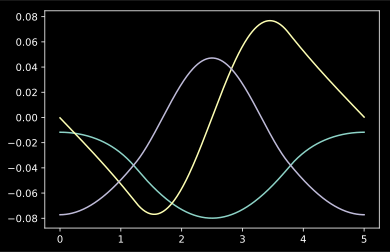

In [33]:
plt.clf()
plt.plot(x, evecs[:,0])
plt.plot(x, evecs[:,1])
plt.plot(x, evecs[:,2])

In [34]:
print(evals[0:6])

[0.34840553 1.36362859 1.87812318 3.85090595 4.01460395 7.79746204]


## Potensial Mathieu

In [35]:
N = 401

A = 0.0
B = 5.0

v0 = 1.5

hh = (B-A)/(N-1)
x = np.zeros(N)
for i in range(N):
    x[i] = i*hh
    
Hamiltonian = np.zeros((N,N))
w = 0.5/hh**2

for i in range(N):
    Hamiltonian[i,i] = 2.0*w
    if i != N-1:
        Hamiltonian[i,i+1] = -w
        Hamiltonian[i+1,i] = -w
Hamiltonian[0,N-1] = -w
Hamiltonian[N-1,0] = -w

L = B - A

vv = np.zeros(N)

# Potensial Mathieu
for i in range(N):
    Hamiltonian[i,i] = Hamiltonian[i,i] + v0*(1.0 + np.cos(2*np.pi*x[i]/L))
        
evals, evecs = scipy.linalg.eigh(Hamiltonian)

In [36]:
print(evals[0:6])

[0.71371452 2.06422868 2.81989674 4.72883163 4.76025445 8.61420375]


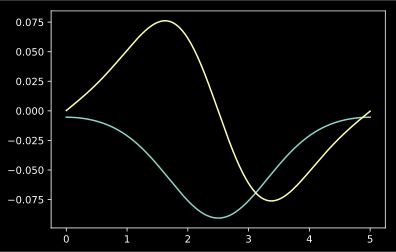

In [38]:
plt.clf()
plt.plot(x, evecs[:,0])
plt.plot(x, evecs[:,1])